<a href="https://colab.research.google.com/github/aravindmurali326/K-means-clustering-iris/blob/main/K_Means_Clustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information** 

The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Attribute information: 
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:-- Iris Setosa --Iris Versicolour -- Iris Virginica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

**Loading and Analysing of dataset**

In [ ]:
df = pd.read_csv("Iris_data.csv", header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#to display statistics about data

df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# to display data basic info about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#to display number of samples on each class

df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

**Preprocessing the dataset**

In [ ]:
#check for null values

df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

**Exploratory Data Analysis**

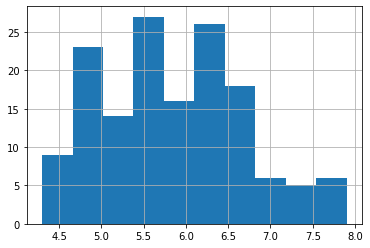

In [ ]:
#histograms
df[0].hist()

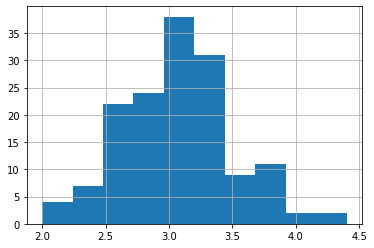

In [ ]:
df[1].hist()

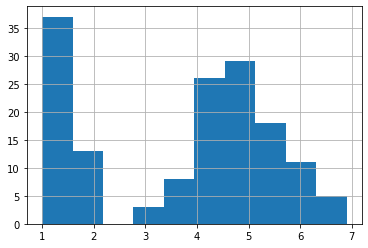

In [ ]:
df[2].hist()

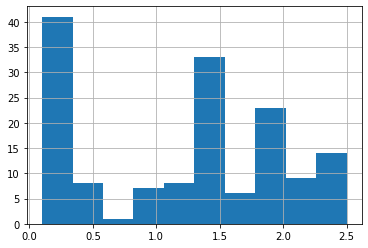

In [ ]:
df[3].hist()

In [ ]:
#scatterplot

colors = ['red', 'orange', 'blue']
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

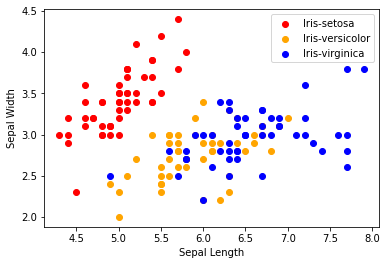

In [ ]:
for i in range(3):
  x = df[df[4] == Species[i]]
  plt.scatter(x[0], x[1], c = colors[i], label = Species[i])
plt.xlabel("Sepal Length")
plt.ylabel('Sepal Width')
plt.legend()

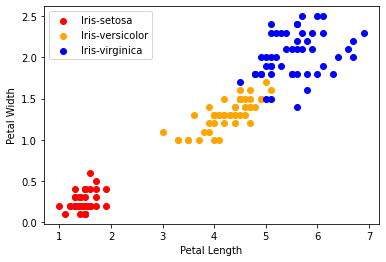

In [ ]:
for i in range(3):
  x = df[df[4] == Species[i]]
  plt.scatter(x[2], x[3], c = colors[i], label = Species[i])
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.legend()

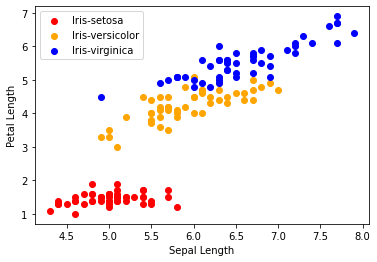

In [ ]:
for i in range(3):
  x = df[df[4] == Species[i]]
  plt.scatter(x[0], x[2], c = colors[i], label = Species[i])
plt.xlabel("Sepal Length")
plt.ylabel('Petal Length')
plt.legend()

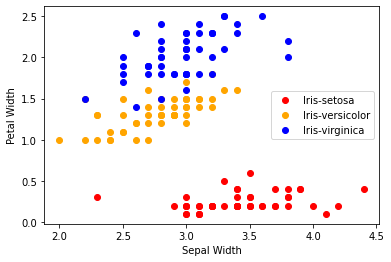

In [ ]:
for i in range(3):
  x = df[df[4] == Species[i]]
  plt.scatter(x[1], x[3], c = colors[i], label = Species[i])
plt.xlabel("Sepal Width")
plt.ylabel('Petal Width')
plt.legend()

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Create a dataframe with the respective column names and display the same

In [ ]:
df = pd.DataFrame(data=iris.data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df['target'] = pd.Series(iris.target)
df['target names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
  if df.iloc[i]['target']==0:
    species.append('setosa')
  elif df.iloc[i]['target']==1:
    species.append('versicolor')
  elif df.iloc[i]['target']==2:
    species.append('virginica')

df['Species'] = species

# New Section

In [ ]:
df

,sepal length,sepal width,petal length,petal width,target,target names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [ ]:
#store the dataset into a variable x
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Text(0, 0.5, 'Sepal Length')

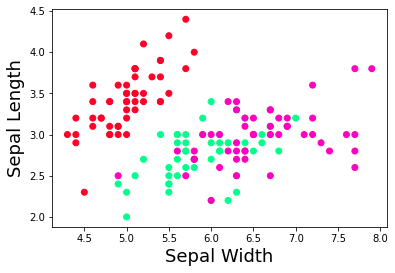

In [ ]:
#Display a scatter plot for the first two columns 
plt.scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal Length', fontsize=18)

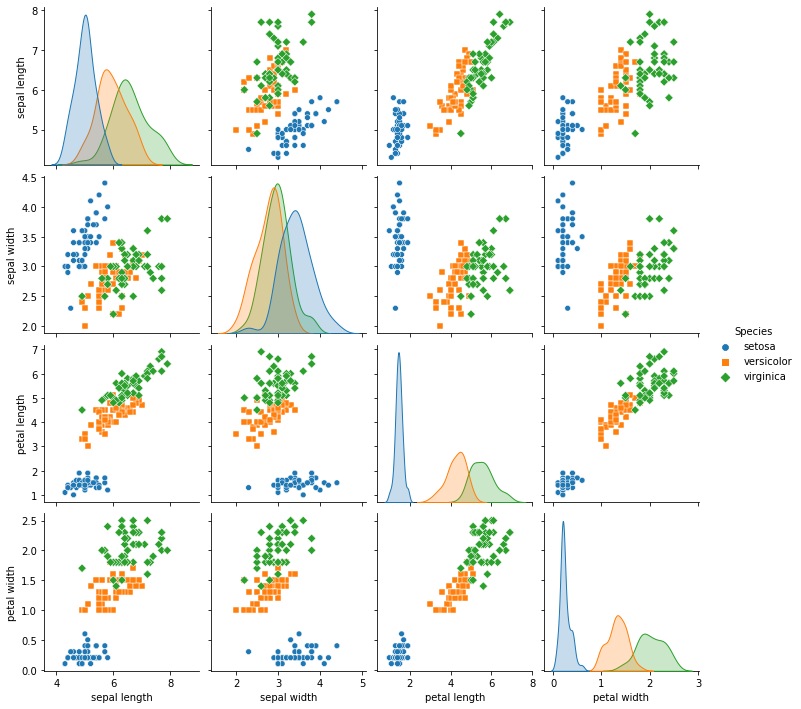

In [ ]:
#Pairplot used for better detailing
sns.pairplot(df.drop(['target'], axis=1), hue='Species', height=2.5, markers=["8","s","D"])

In [ ]:
#Estimate the value of k, here k=5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=0)
y = kmeans.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 3 4 4 4 3 4 3 3 4 3 4 3 4 4 3 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 1 4 2 1 1 2 3 2 1 2 1
 1 1 4 1 1 1 2 2 4 1 4 2 4 1 2 4 4 1 2 2 2 1 4 4 2 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


In [ ]:
#Find the centroids for 5 clusters
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

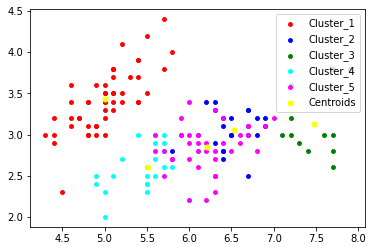

In [ ]:
#plot the centroids and the clusters

plt.scatter(x[y==0,0], x[y==0,1], s=15, c='red', label='Cluster_1')
plt.scatter(x[y==1,0], x[y==1,1], s=15, c='blue', label='Cluster_2')
plt.scatter(x[y==2,0], x[y==2,1], s=15, c='green', label='Cluster_3')
plt.scatter(x[y==3,0], x[y==3,1], s=15, c='cyan', label='Cluster_4')
plt.scatter(x[y==4,0], x[y==4,1], s=15, c='magenta', label='Cluster_5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='yellow', label='Centroids')
plt.legend()
plt.show()


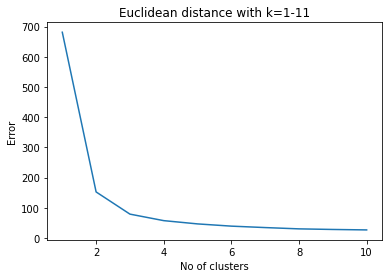

In [ ]:
# use the formula of square of sum of distance between the centroid and observation
#The value of k is calcualted by the distance formula

Error=[]
for i in range(1,11):
  kmeans1 = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0).fit(x)
  kmeans1.fit(x)
  Error.append(kmeans1.inertia_)

import matplotlib.pyplot as plt

#Graphical representation of k value

plt.plot(range(1,11),Error)
plt.title('Euclidean distance with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=21)
y=kmeans3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

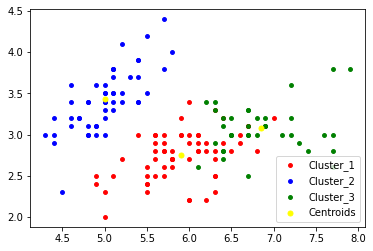

In [ ]:
plt.scatter(x[y==0,0], x[y==0,1], s=15, c='red', label='Cluster_1')
plt.scatter(x[y==1,0], x[y==1,1], s=15, c='blue', label='Cluster_2')
plt.scatter(x[y==2,0], x[y==2,1], s=15, c='green', label='Cluster_3')


plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=25, c='yellow', label='Centroids')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Predicted')

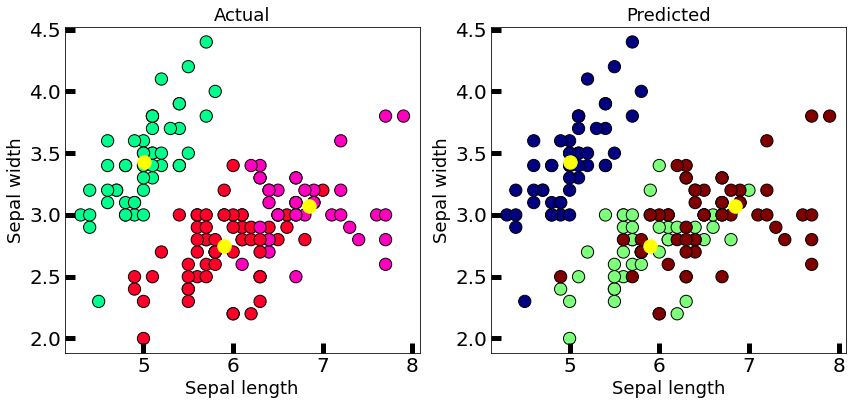

In [ ]:
#Comparison of the actual and predicted values

fig, axes = plt.subplots(1,2, figsize=(14,6))
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet', edgecolor='k', s=150)
axes[0].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1],s=180, c='yellow', label='Centroids')
axes[1].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1],s=180, c='yellow', label='Centroids')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted',fontsize=18)




Text(0.5, 1.0, 'Predicted')

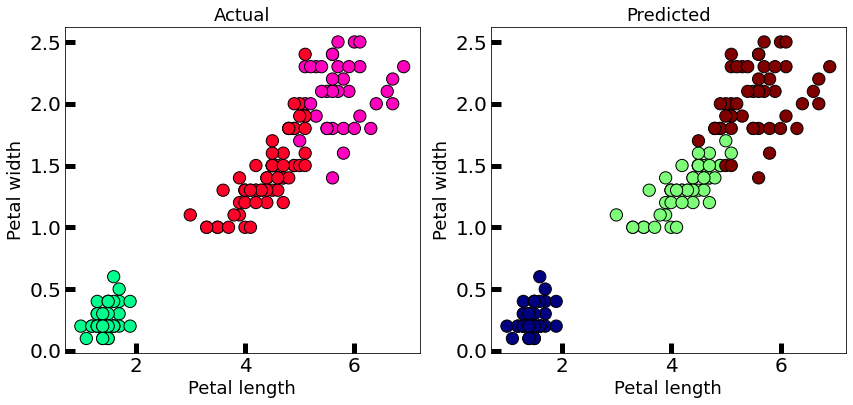

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
axes[0].scatter(x=df['petal length'], y=df['petal width'], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x=df['petal length'], y=df['petal width'], c=iris.target, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

In [ ]:
#Shows the total samples of target and predicted values
pd.crosstab(iris.target,y)

col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36
